## Imports

In [97]:
import os
import pandas as pd 
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
import ast

from IPython.display import display
from kaggle.api.kaggle_api_extended import KaggleApi


## Load Dataset 1

In [ ]:
# Set your Kaggle credentials (ensure you have a kaggle.json file)
api = KaggleApi()
api.authenticate()

# Define dataset and path
dataset = "thedevastator/billboard-hot-100-audio-features"
save_path = os.getcwd()  # Current directory

# Download dataset
api.dataset_download_files(dataset, path=save_path, unzip=True)

print(f"Dataset downloaded to: {save_path}")


In [2]:
hot_stuff = pd.read_csv('Hot Stuff.csv')
hot_stuff.head(10)

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
5,5,http://www.billboard.com/charts/hot-100/1965-0...,8/21/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,9
6,6,http://www.billboard.com/charts/hot-100/1965-0...,8/28/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,10
7,7,http://www.billboard.com/charts/hot-100/1965-0...,9/4/1965,36,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,8,11
8,8,http://www.billboard.com/charts/hot-100/1997-0...,4/19/1997,97,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,NaN,97,1
9,9,http://www.billboard.com/charts/hot-100/1997-0...,4/26/1997,90,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,97.0,90,2


## Data Analysis & Processing

### Hot Stuff dataset

In [3]:
print("Hot stuff Dataset contains :", len(hot_stuff), "rows")

Hot stuff Dataset contains : 327895 rows


In [4]:
hot_stuff.columns

Index(['index', 'url', 'WeekID', 'Week Position', 'Song', 'Performer',
       'SongID', 'Instance', 'Previous Week Position', 'Peak Position',
       'Weeks on Chart'],
      dtype='object')

In [5]:
print(f"It also contains  \n{hot_stuff.isna().sum()} \nNull values")

It also contains  
index                         0
url                           0
WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64 
Null values


In [6]:
print(f"In Previous Week Postion {hot_stuff['Previous Week Position'].isna().sum()/len(hot_stuff['Previous Week Position']):.2%} of the data is missing")

In Previous Week Postion 9.75% of the data is missing


In [7]:
hot_stuff.describe()

,index,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,327895.000000,327895.000000,327895.000000,295941.000000,327895.000000,327895.000000
mean,163947.000000,50.499309,1.072538,47.604066,41.358307,9.153793
std,94655.277595,28.865707,0.334188,28.056915,29.542497,7.590281
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,81973.500000,25.500000,1.000000,23.000000,14.000000,4.000000
50%,163947.000000,50.000000,1.000000,47.000000,39.000000,7.000000
75%,245920.500000,75.000000,1.000000,72.000000,66.000000,13.000000
max,327894.000000,100.000000,10.000000,100.000000,100.000000,87.000000


In [64]:
print(f"Hot Stuff has {hot_stuff['Song'].nunique()} unique tracks")

Hot Stuff has 24360 unique tracks


### Hot 100 Audio Features

In [65]:
hot_100 = pd.read_csv('Hot 100 Audio Features.csv')
hot_100.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


### Percentage of nan values per column

In [66]:
def plot_nan_per_col(df, data_name):
    series = df.isna().sum().sort_values()
    series = series/len(df) * 100
    x = series.keys()
    y = list(series)
    fig, ax = plt.subplots(1, 1)
    sns.barplot(x=x, y = y)
    plt.xlabel('Column')
    plt.ylabel('% of Nan Values')
    plt.title(f'Percentage of Nan Values per column in Dataset : {data_name}')
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.plot()

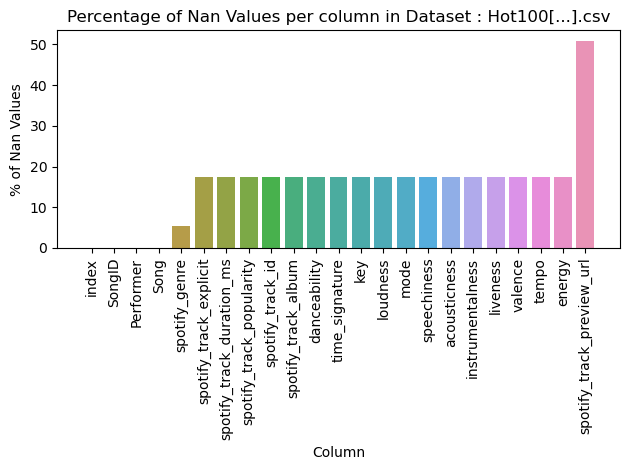

In [67]:
plot_nan_per_col(hot_100, 'Hot100[...].csv')

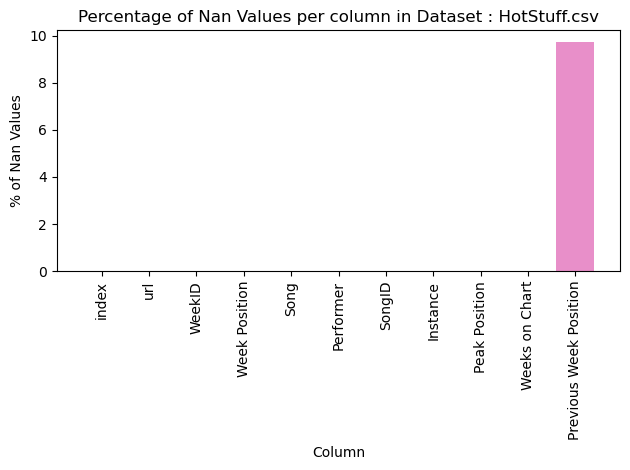

In [68]:
plot_nan_per_col(hot_stuff, 'HotStuff.csv')

If the track just appeared on the billboard, it's normal that it doesn't have a previous week position so we'll keep this rows as is

## Drop all rows that do not have a preview url

In [71]:
hot_100.dropna(subset=['spotify_track_preview_url'], inplace=True)

## Merge the two datasets

In [72]:
billboard_100 = hot_100.merge(hot_stuff, on=['Performer', 'SongID', 'Song']).drop(columns=['index_y', 'index_x']).reset_index()
billboard_100.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,tempo,time_signature,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1
1,1,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3
3,3,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6
4,4,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5


In [73]:
billboard_100['Year'] = billboard_100['WeekID'].apply(lambda x : int(x.split('/')[2]))
billboard_100.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,time_signature,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,0,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1,1965
1,1,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2,1965
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3,1965
3,3,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6,1965
4,4,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5,1965
5,5,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/24/1965,40,1,50.0,40,4,1965
6,6,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/15/1965,43,1,36.0,36,7,1965
7,7,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,11/21/1998,17,1,NaN,17,1,1998
8,8,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,11/28/1998,14,1,17.0,14,2,1998
9,9,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,18,1,14.0,14,3,1998


In [74]:
avg_standing_per_year = billboard_100.groupby(['Year', 'Performer'])['Week Position'].mean().reset_index(name='Avg Position')
avg_standing_per_year.head(5)

,Year,Performer,Avg Position
0,1958,Andy Rose,85.857143
1,1958,Betty Madigan,64.333333
2,1958,Bill Doggett,86.000000
3,1958,Bill Parsons,47.500000
4,1958,Billy & Lillie,66.500000


In [75]:
billboard_100['Year'].sort_values().unique()

array([1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [76]:
len(billboard_100)

169915

In [77]:
billboard_100.isna().sum()

index                            0
SongID                           0
Performer                        0
Song                             0
spotify_genre                 1305
spotify_track_id                 0
spotify_track_preview_url        0
spotify_track_duration_ms        0
spotify_track_explicit           0
spotify_track_album             62
danceability                   190
energy                         190
key                            190
loudness                       190
mode                           190
speechiness                    190
acousticness                   190
instrumentalness               190
liveness                       190
valence                        190
tempo                          190
time_signature                 190
spotify_track_popularity         0
url                              0
WeekID                           0
Week Position                    0
Instance                         0
Previous Week Position       15782
Peak Position       

In [78]:
billboard_100.dropna(subset=['spotify_genre', 'danceability'], inplace=True) # could have chosen any other criteria like loudness etc, but full rows were missing

In [79]:
len(billboard_100)

168420

## Get the top 10 performing artists per year

In [80]:
# Group by Year and get top 10 performers per year based on best (lowest) average position
df_top_per_year = (
    avg_standing_per_year.groupby("Year")
    .apply(lambda x: x.nsmallest(10, "Avg Position"))
    .reset_index(drop=True)
)

In [81]:
df_top_per_year

,Year,Performer,Avg Position
0,1958,The Playmates,12.555556
1,1958,Elvis Presley,13.470588
2,1958,Domenico Modugno,16.500000
3,1958,The Elegants,18.294118
4,1958,Jimmy Clanton And His Rockets,18.466667
...,...,...,...
635,2021,The Ronettes,13.000000
636,2021,Perry Como And The Fontane Sisters With Mitche...,15.000000
637,2021,Andy Williams,16.800000
638,2021,Darlene Love,19.000000


## Plot top 10 Artists

In [83]:
# define range for the slider
min_year = df_top_per_year["Year"].min()
max_year = df_top_per_year["Year"].max()

# create a slider widget
year_slider = widgets.IntSlider(
    value=min_year, min=min_year, max=max_year - 4, step=1, description="Start Year:"
)

def update_plot(start_year):
    end_year = start_year + 1 
    df_filtered = df_top_per_year[(df_top_per_year["Year"] >= start_year) & (df_top_per_year["Year"] <= end_year)]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_filtered, x="Year", y="Avg Position", hue="Performer", dodge=True, palette="coolwarm")

    plt.gca().invert_yaxis()  # lower average position is better
    plt.title(f"Top 10 Artists' per year Average Chart Positions ({start_year} - {end_year})")
    plt.xlabel("Year")
    plt.ylabel("Avg Position (Lower is Better)")
    plt.legend(title="Performer", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

widgets.interactive(update_plot, start_year=year_slider)


interactive(children=(IntSlider(value=1958, description='Start Year:', max=2017, min=1958), Output()), _dom_cl…

In [86]:
billboard_100['spotify_genre']

0         ['adult standards', 'brill building pop', 'eas...
1         ['adult standards', 'brill building pop', 'eas...
2         ['adult standards', 'brill building pop', 'eas...
3         ['adult standards', 'brill building pop', 'eas...
4         ['adult standards', 'brill building pop', 'eas...
                                ...                        
169910                                        ['freestyle']
169911                                        ['freestyle']
169912                                        ['freestyle']
169913                                        ['freestyle']
169914                                        ['freestyle']
Name: spotify_genre, Length: 168420, dtype: object

### Top 20 Genres

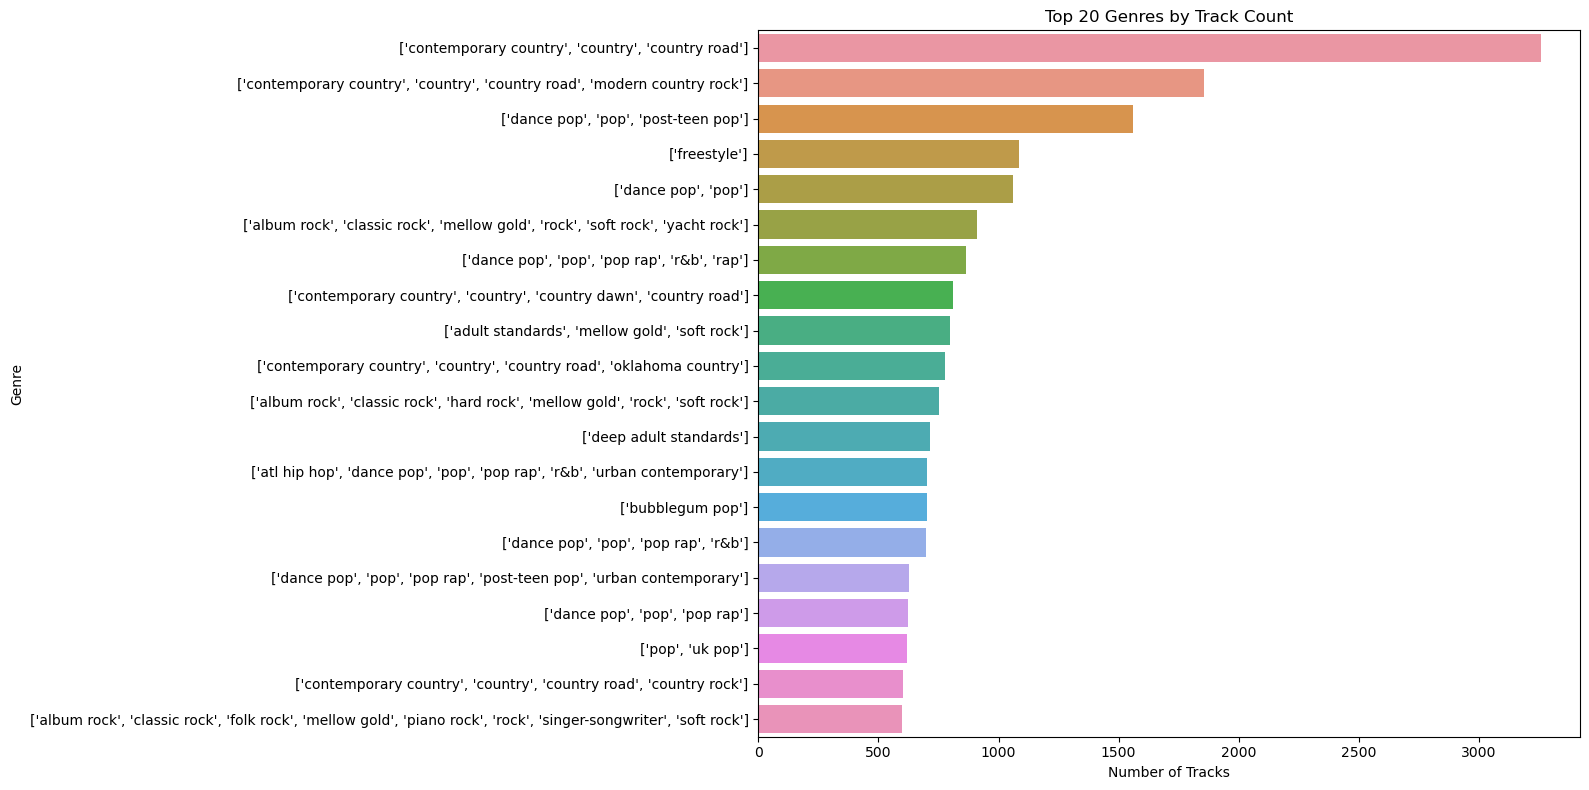

In [96]:
# remove rows where the genre is an empty list
billboard_100_filtered = billboard_100[billboard_100['spotify_genre'].apply(lambda x: x != '[]')]

# compute the top 20 genres after filtering
genre_counts = billboard_100_filtered['spotify_genre'].value_counts().head(20)

# Plot the updated genre distribution
plt.figure(figsize=(16, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 20 Genres by Track Count')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In the original dataset, some tracks have an empty genre field ([]). These missing genre labels prevent us from accurately analyzing genre distribution and trends. Since genre information is crucial for our analysis, we removed all rows with empty genres to ensure that only tracks with valid classifications are included in the visualization. This allows us to gain a clearer understanding of the most popular genres without distortions caused by missing data.

Uh oh, the genres are stored as strings that represent lists, meaning each track can belong to multiple genres at once. However, since they are stored as strings, they are not directly usable for proper analysis.

To better analyze genre distributions, we need to split these genre strings into individual genres and count them separately. This allows us to assess the true popularity of each genre across all tracks rather than treating multi-genre tracks as a single category.

/var/folders/6l/swjtq9296x5_2ys0mkblyhmh0000gn/T/ipykernel_83152/3270168502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billboard_100_filtered['spotify_genre'] = billboard_100_filtered['spotify_genre'].apply(ast.literal_eval)


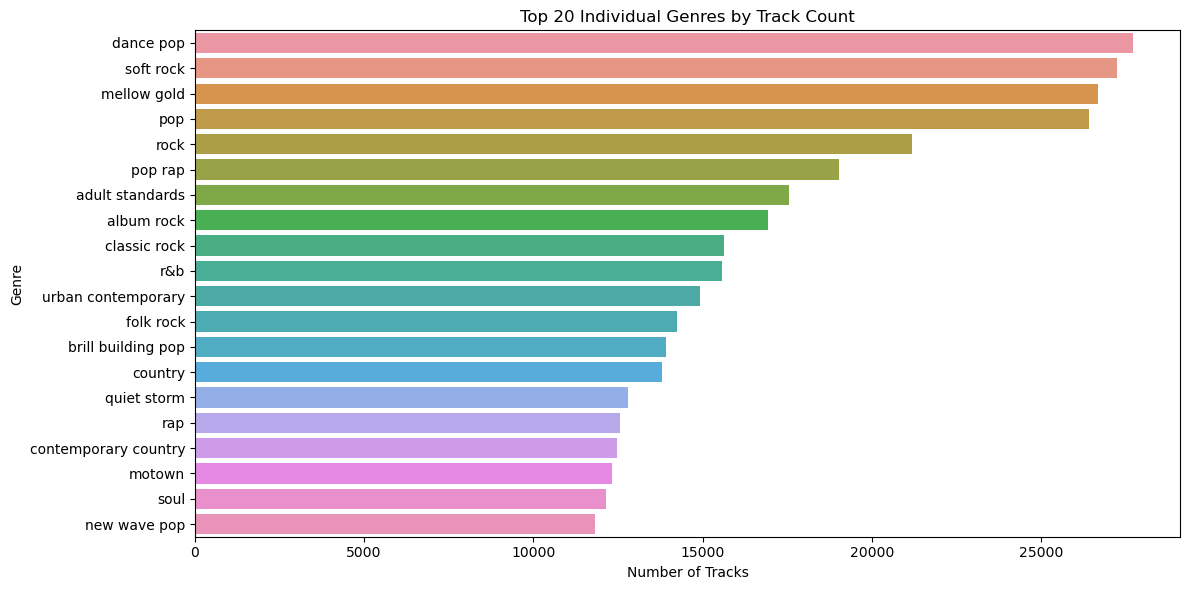

In [98]:
# convert genre column from string representation of a list to an actual list
billboard_100_filtered['spotify_genre'] = billboard_100_filtered['spotify_genre'].apply(ast.literal_eval)

# explode the genre column so that each genre appears in its own row
billboard_100_exploded = billboard_100_filtered.explode('spotify_genre')

# compute genre counts
genre_counts = billboard_100_exploded['spotify_genre'].value_counts().head(20)

# Plot the updated genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 20 Individual Genres by Track Count')
plt.xlabel('Number of Tracks')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


The updated genre distribution provides **a much clearer and more insightful** view of the data. By breaking down multi-genre entries into individual genres, we now have a **more accurate representation** of how often each genre appears in the Billboard charts. This refinement highlights the overwhelming presence of **pop-related genres**, reinforcing its dominance in mainstream music. Instead of treating multi-genre tracks as single unique categories, this approach allows us to see which genres truly shape the charts, offering **better insights into music trends**. This enhanced visualization ensures a more precise analysis of genre popularity while preventing any genre from being underrepresented due to formatting inconsistencies.

### Let's use the popularity score to see if we obtain similar results

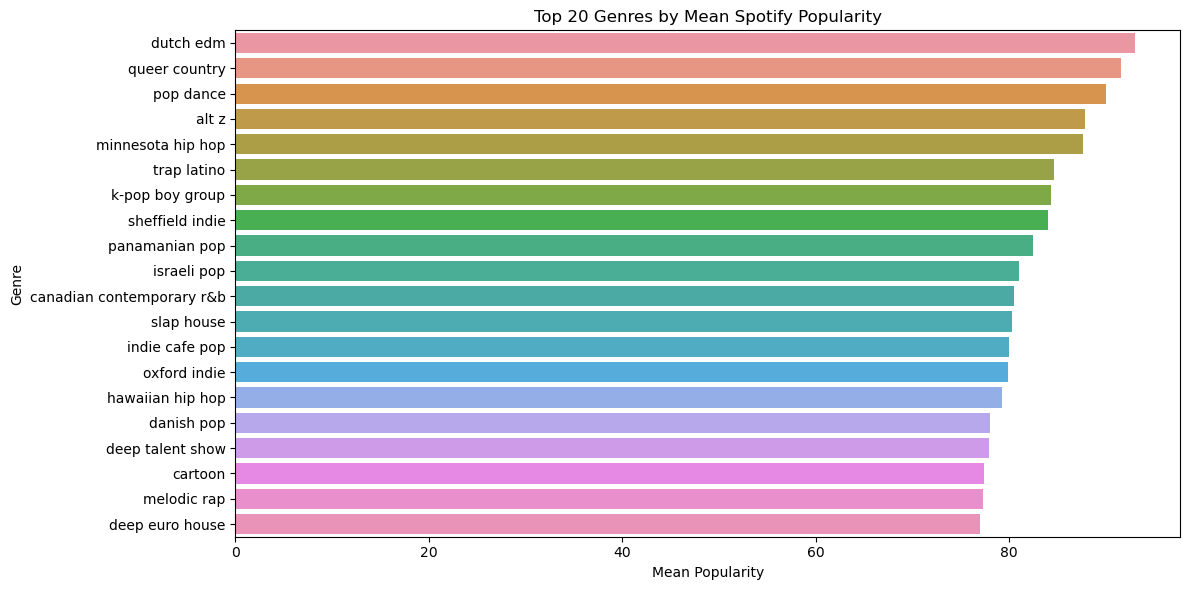

In [100]:
mean_popularity = billboard_100_exploded.groupby('spotify_genre')['spotify_track_popularity'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=mean_popularity.values, y=mean_popularity.index)
plt.title('Top 20 Genres by Mean Spotify Popularity')
plt.xlabel('Mean Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


When comparing the **top 20 genres by mean Spotify popularity** to the **most frequent genres in the Billboard charts**, we see notable differences. While **pop and mainstream genres dominate the Billboard rankings**, the most **popular** genres on Spotify include **niche and regional styles** like **Dutch EDM, queer country, and Minnesota hip hop**. This suggests that while certain genres chart more frequently, others maintain **high engagement and popularity among listeners** despite having fewer total tracks.

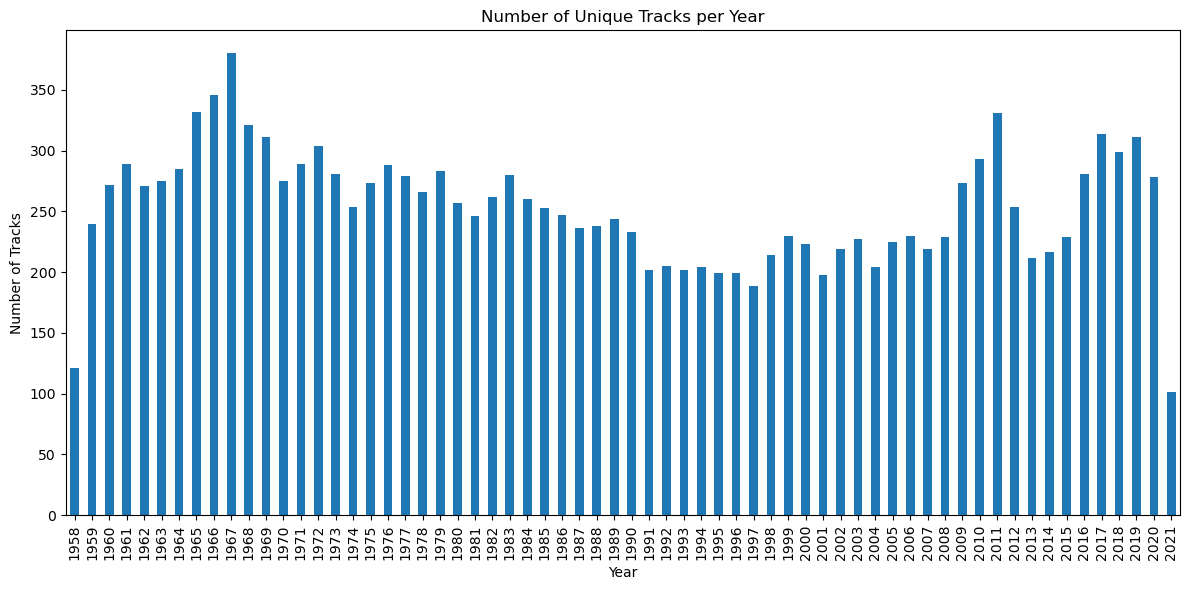

In [102]:
billboard_100_exploded['Year'] = pd.to_datetime(billboard_100_exploded['WeekID']).dt.year
tracks_per_year = billboard_100_exploded.groupby('Year')['SongID'].nunique()

plt.figure(figsize=(12, 6))
tracks_per_year.plot(kind='bar')
plt.title('Number of Unique Tracks per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.show()


### Number of unique artist per genre

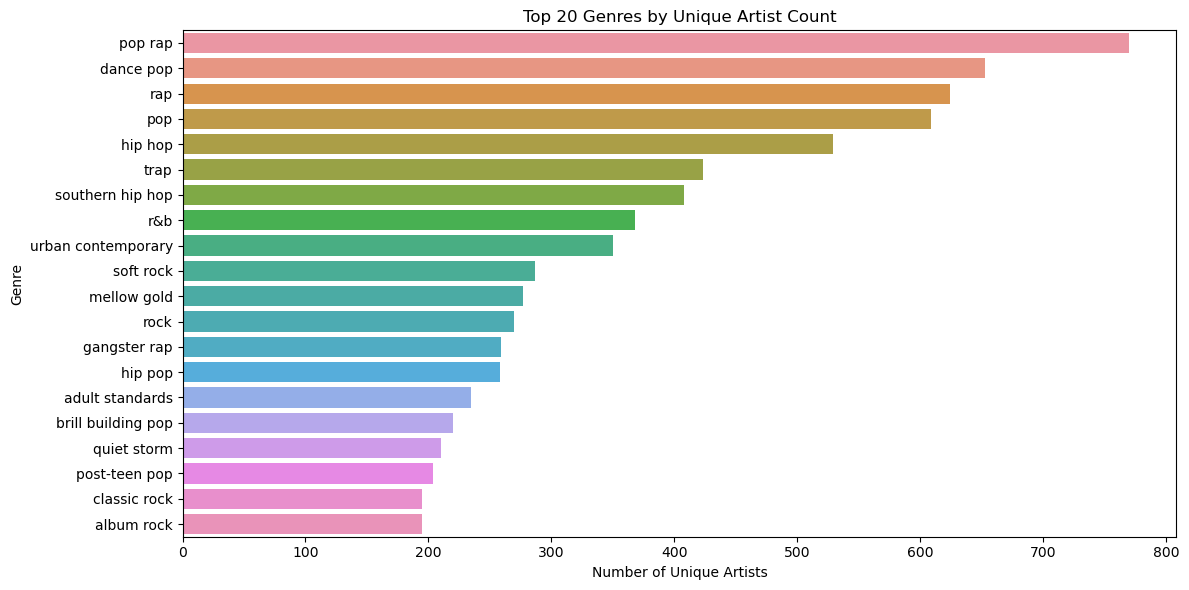

In [103]:
artists_per_genre = billboard_100_exploded.groupby('spotify_genre')['Performer'].nunique().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=artists_per_genre.values, y=artists_per_genre.index)
plt.title('Top 20 Genres by Unique Artist Count')
plt.xlabel('Number of Unique Artists')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## Load Dataset 2

In [ ]:
dataset = "asaniczka/top-spotify-songs-in-73-countries-daily-updated"
save_path = os.getcwd()  # Current directory

# Download dataset
api.dataset_download_files(dataset, path=save_path, unzip=True)

print(f"Dataset downloaded to: {save_path}")

In [60]:
top_50_spotify = pd.read_csv('universal_top_spotify_songs.csv')
top_50_spotify.head(5)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,0,49,NaN,2025-03-13,77,False,...,6,-7.727,0,0.0317,0.2890,0.00000,0.126,0.498,157.964,3
1,1musbempyJAw5gfSKZHXP9,Anxiety,Doechii,2,3,48,NaN,2025-03-13,84,True,...,0,-6.838,1,0.0373,0.3380,0.00054,0.105,0.888,129.023,4
2,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",3,-1,0,NaN,2025-03-13,91,False,...,0,-4.477,0,0.2600,0.0283,0.00000,0.355,0.939,149.027,4
3,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",4,0,-2,NaN,2025-03-13,93,False,...,2,-7.546,1,0.1250,0.2510,0.00000,0.248,0.576,138.008,4
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,-2,-1,NaN,2025-03-13,97,False,...,2,-10.171,1,0.0358,0.2000,0.06080,0.117,0.438,104.978,4


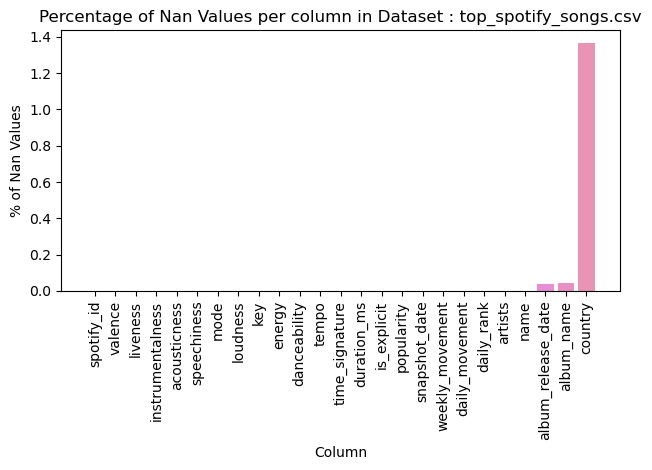

In [61]:
plot_nan_per_col(top_50_spotify, 'top_spotify_songs.csv')

For the **country** column in the **Top Spotify Tracks per Country** dataset, missing values are problematic since this column is central to our analysis. Since our focus is on track popularity across different countries, we will **remove all rows where the country value is missing** to ensure the dataset remains relevant and accurately represents regional trends in music consumption.

### Since we need the country info, we'll drop all rows that have nan countries

In [54]:
print(f'Number of rows before dropping Nan in Country column : {len(top_50_spotify)}')
top_50_spotify.dropna(subset=['country'], inplace=True)
print(f'Number of rows after dropping Nan in Country column : {len(top_50_spotify)}')


Number of rows before dropping Nan in Country column : 1814925
Number of rows after dropping Nan in Country column : 1790118


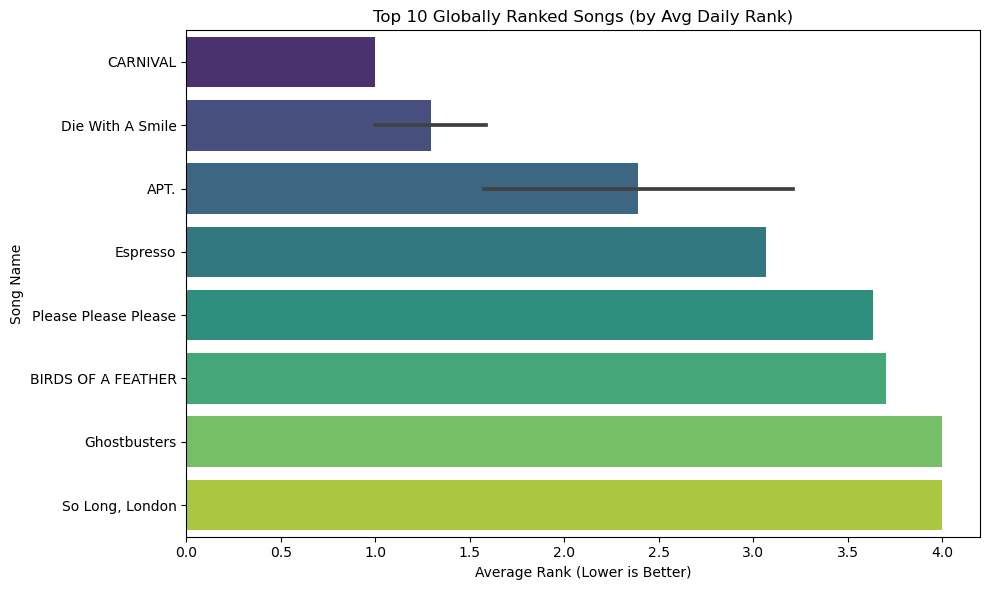

In [105]:
global_top = top_50_spotify[top_50_spotify['country'].isna()]

# Average rank per song in Global Top 50
top_global_songs = (
    global_top.groupby(['spotify_id', 'name'])['daily_rank']
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='daily_rank', y='name', data=top_global_songs, palette='viridis')
plt.title('Top 10 Globally Ranked Songs (by Avg Daily Rank)')
plt.xlabel('Average Rank (Lower is Better)')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()


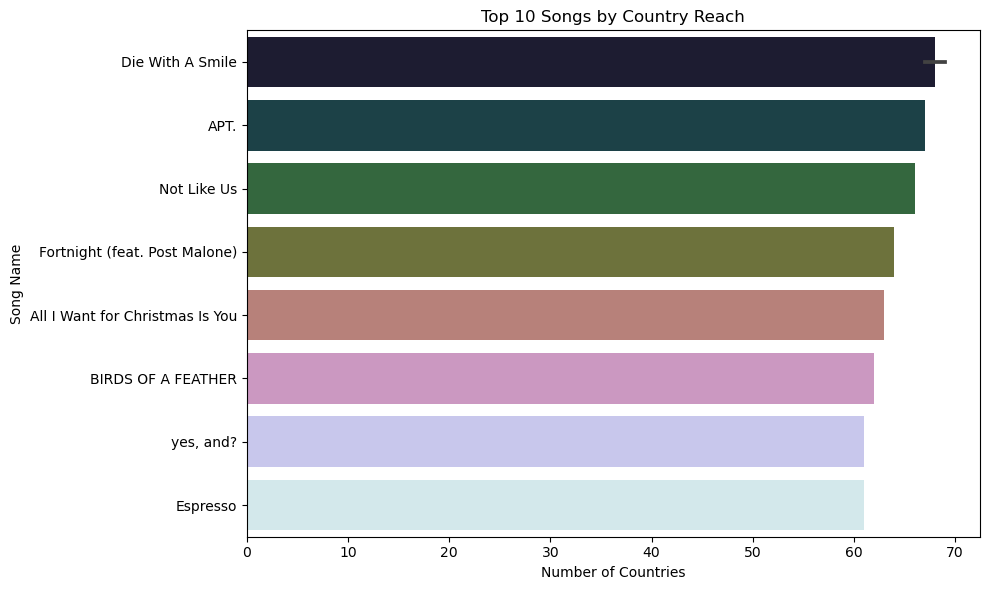

In [114]:

country_data = top_50_spotify[top_50_spotify['country'].notna()]

# Count unique countries for each song
song_country_count = (
    country_data.groupby(['spotify_id', 'name'])['country']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='name', data=song_country_count, palette='cubehelix')
plt.title('Top 10 Songs by Country Reach')
plt.xlabel('Number of Countries')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()


Shifting to this dataset, which tracks **Spotify's top songs across multiple countries**, this plot highlights the **top 10 songs with the widest global reach**. It shows which tracks are charting in the most countries, offering insight into the most internationally popular songs.

### Merge on spotify ID

In [ ]:
merged = pd.merge(top_50_spotify, billboard_100_exploded, left_on='spotify_id', right_on='spotify_track_id', how='inner')


In [110]:
merged

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,time_signature_y,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
1,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
2,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
3,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
4,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307954,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307955,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307956,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307957,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002


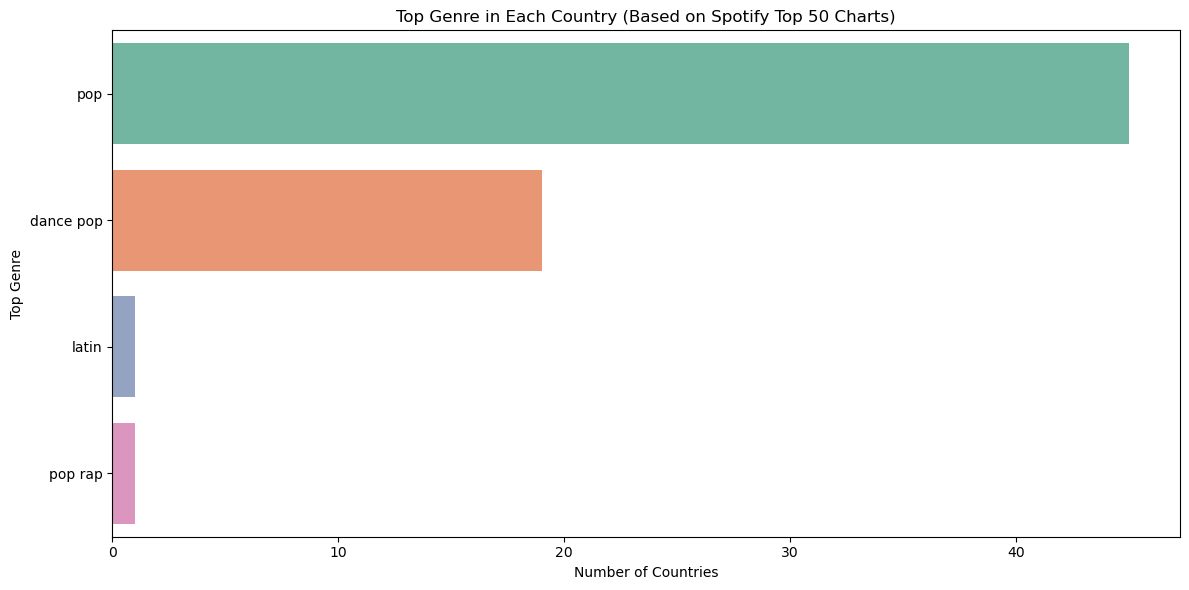

In [113]:
merged_country = merged[merged['country'].notna()].copy()

# simplify genre: take only the first genre (e.g., "pop, dance pop" -> "pop")
merged_country['main_genre'] = merged_country['spotify_genre'].str.split(',').str[0].str.strip()

# get top genre per country by count
top_genres_per_country = (
    merged_country.groupby(['country', 'main_genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

# pick the top genre per country
top_genres_per_country = top_genres_per_country.groupby('country').first().reset_index()

plt.figure(figsize=(12, 6))
sns.countplot(data=top_genres_per_country, y='main_genre', order=top_genres_per_country['main_genre'].value_counts().index, palette='Set2')
plt.title('Top Genre in Each Country (Based on Spotify Top 50 Charts)')
plt.xlabel('Number of Countries')
plt.ylabel('Top Genre')
plt.tight_layout()
plt.show()


Building on this, we now examine the **most dominant genre in each country** based on **Spotify’s Top 50 charts**. This visualization highlights how **pop and dance pop overwhelmingly lead** across multiple countries, while Latin and pop rap appear in a few regions, reflecting regional preferences in global music consumption.